# Integrated Project 

An online store which sells games all over the world, is planning a campaign for 2017. I'm going to preform analysis based on data of games sales available from open source. This will help me ifentify patterns that determine whether a game succeeds or not, spot potential big winners, and plan advertising campaigns.  
My analysis cointains 5 main steps:
1. preprocessing the data
2. Determine which years and platforms (e.g. Xbox or PlayStation) are relevant for the research
3. Study the difference between region (Europe, North Amercia, Japan)
4. Test hypotheses to check the affect of user ratings on sales
5. Draw conclusion 

# Step 1. Open the data file and study the general information

In [1]:
!pip install seaborn -U

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 292 kB 2.0 MB/s eta 0:00:01


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


In [3]:
try:
    data= pd.read_csv('/datasets/games.csv')
except:
    data= pd.read_csv('games.csv')

In [4]:
data.sample(10)
#we can see each row contains name of a game, genre, platform different incomes and rating. 
#I can spot missing values and zeros that I will have to check

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9423,Alone in the Dark: Inferno,PS3,2008.0,Adventure,0.09,0.03,0.00,0.02,69.0,5.6,M
162,Super Mario Advance,GBA,2001.0,Platform,3.14,1.24,0.91,0.20,84.0,7.8,E
13203,Secret Files: Tunguska,DS,2008.0,Adventure,0.04,0.01,0.00,0.00,71.0,7.6,T
1863,SingStar Legends,PS2,2006.0,Misc,0.12,0.75,0.00,0.23,76.0,tbd,T
3521,Harvest Moon: Sunshine Islands,DS,2008.0,Simulation,0.35,0.03,0.17,0.03,NaN,NaN,NaN
1108,Ms. Pac-Man,2600,1981.0,Puzzle,1.54,0.10,0.00,0.02,NaN,NaN,NaN
10825,One Piece: Burning Blood,PSV,2016.0,Fighting,0.00,0.02,0.07,0.00,62.0,7.8,T
9028,Cave Story 3D,3DS,2011.0,Platform,0.09,0.03,0.01,0.01,82.0,7.7,E10+
13640,Nike+ Kinect Training,X360,2012.0,Sports,0.02,0.01,0.00,0.00,NaN,NaN,NaN
8744,Wolfenstein: The Old Blood,XOne,2015.0,Action,0.07,0.07,0.00,0.01,75.0,8,NaN


# Step 2. Prepare the data


Replace the column names (make them lowercase)

In [5]:
data.columns=data.columns.str.lower()
data.head()
#this way it will be easier to work with the data and avoid typo errors

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
Another way to convert all columns' values to lowercase (if it is necessary) in dataframe is:
       
`df = df.applymap(lambda s:s.lower() if type(s) == str else s)`

In [6]:
data.describe()
#numerical info

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
data.describe(include='object')
#object info.

,name,platform,genre,user_score,rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
def missing_values(data):
    report = data.isna().sum().to_frame()
    report = report.rename(columns = {0: 'missing_values'})
    report['% of total'] = ((report['missing_values'] / data.shape[0]) *100).round(2)
    display(report)
#function for showing the missing values in every column

In [10]:
missing_values(data)
# the scores and ratings has lots of missing values that I need to handle

,missing_values,% of total
name,2,0.01
platform,0,0.00
year_of_release,269,1.61
genre,2,0.01
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00
other_sales,0,0.00
critic_score,8578,51.32
user_score,6701,40.09


In [11]:
data.loc[data['name'].isnull()]
#There is two games without a name and genre. I will drop them

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
data.dropna(subset = ['name'], inplace=True)

In [13]:
data['year_of_release']= data.year_of_release.fillna(data.groupby('platform')['year_of_release'].transform('mean'))
#I decided to fill the missing years of release by the average years of each platform 

In [14]:
data.year_of_release= data.year_of_release.astype(int)
#changing the column from float to integer so it will be more readable

In [15]:
data.user_score.describe()
#this column is an object type due to the 'tbd' value. I can't change it to numerical type. I will
#keep it as it is and later on I will exclude tbd when I check hypothesis.

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

In [16]:
data[data['user_score']== 'tbd']['year_of_release'].value_counts()

2009    406
2008    355
2010    331
2011    217
2007    192
2002    192
2006    124
2005    121
2004    111
2003    106
2001     82
2000     43
2015     38
2016     34
2012     24
2014     21
2013     17
1999      8
1997      1
1998      1
Name: year_of_release, dtype: int64

In [17]:
data['user_score']=data['user_score'].replace('tbd', np.nan)

In [18]:
data['user_score'] = pd.to_numeric(data['user_score'], downcast = 'float', errors='ignore')

In [19]:
data.critic_score.describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [20]:
#data.critic_score= data.critic_score.fillna(data.critic_score.median())
#fill the nan values with the critic's median score

In [21]:
data['rating']= data['rating'].fillna('unknown')
#I replaced the missing value in ESRB rating with the common rating by genre                     

Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column

In [22]:
data['total_sales']= data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


# conclusion

For the first part of the analysis we can conclude several points:
1. critic_score has a lot of missing values probably because some of the games are too new and 
   didn't review by game critics and perhaps others just didn't reviewed by critics at all.
2. user_score has a value named tbd(to be determined). At first I thought that new games still    didn't got a user review and that is the reason for tbd but when I searched the user score    by the years of release I found that tbd is in all of them so I'm going to treat them as      missing values and later on I will exclude them from the analysis.


<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
Ok, Idan, you offered and implemented the strategy that allows to fill in missing values with median, mean and mode. But, to tell the truth, there are too many missing values in the columns critic_score and user_score too, so it is rather risky to fill in missing values in this columns with median or mean. In fact, we do not know why the data in these columns is missing (we can only hypothesize), and we do not have access to a source that would allow us to replenish the data, restore it, so it is better leave missing values in the data or you can simply replace them with indicators, which you can filter at the next steps of the analysis if it is necessary. Missing values are also some kind of signal worth paying attention to and analyzing, it is valuable in its own way! The analyst's goal when working with missing values is not about filling the 100% of missing values! When filling missing values, it is important to proceed from the specifics of the data, take into account the risks of data distortion and the introduction of artificial trends and characteristics.
       
I would like to recommend you to leave the missing values in these columns as they are.
       
As for rating column, you are right, we again cannot restore the data in this column, because the percentage of missing values is really high, but we can replace missing values in this column with marker value `unknown` because later in this project it is important to take into account the games without rating.
       
As for tbd - it is better to preprocess it too. The strategy is: you change this value to NaN and then convert the whole column to float type. Another way is:
       
`data['user_score'] = pd.to_numeric(data['user_score'], downcast = 'float', errors='ignore')`
       
or like this:
       
`df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')`
       
Also we have some missing values in genre and game columns. As a whole we can drop them, please, check.

<font color='Purple'>Student's commentary: You are absoultly right and I had struggled with filling/not filling the missing values. My approch was to fill it just for the sake of practice. 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, Idan, thank you for explanation, if it for additional practice - ok, it can be so, my aim is to provide the recommendations and alternative view, so, anyway, now the tbd value and missing values in rating column is preprocessed correctly. As for missing values in user_score and critic_score - ok, its your choice as an analyst💪
</div>

# Step 3. Analyze the data

In [23]:
game_year= data.groupby(['year_of_release'])['name'].count().reset_index()
game_year

,year_of_release,name
0,1980,9
1,1981,46
2,1982,53
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


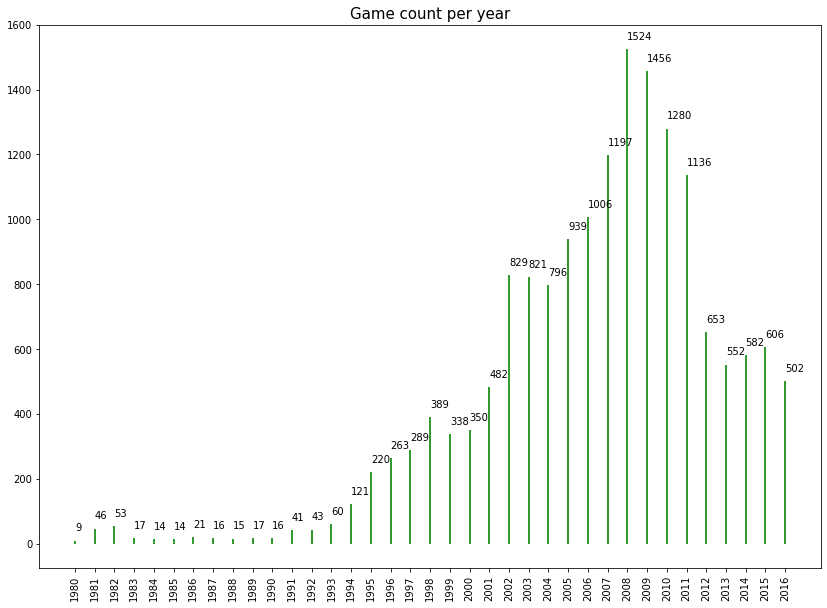

In [24]:
fig, ax = plt.subplots(figsize=(14,10))
ax.vlines(x='year_of_release',ymin=0, ymax=game_year.name, color='green', alpha=0.8, data=game_year, linewidth=2)
ax.set_title('Game count per year', fontdict={'size':15})
ax.set_xticks(game_year.year_of_release)
ax.set_xticklabels(game_year.year_of_release,rotation=90)
for row in game_year.itertuples():
    ax.text(row.year_of_release, row.name+30, s= round(row.name))
plt.show()


We can observe that there was a peak of game releases in 2007-2010 and then a huge descent.

Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year

In [25]:
platform_sales= data.groupby(['platform'])['total_sales'].sum().reset_index()

platform_sales.sort_values(by='total_sales')

,platform,total_sales
14,PCFX,0.03
9,GG,0.04
1,3DO,0.10
24,TG16,0.16
25,WS,1.42
12,NG,1.44
22,SCD,1.86
3,DC,15.95
8,GEN,28.35
21,SAT,33.59


In [26]:
platform_sales['sales_z']=(platform_sales['total_sales']-platform_sales['total_sales'].mean())/platform_sales['total_sales'].std()
#I'm runnig a z test which tell me how far the total sales for each platform from the mean in std points


In [27]:
platform_sales.sort_values(by='sales_z')

,platform,total_sales,sales_z
14,PCFX,0.03,-0.825614
9,GG,0.04,-0.825586
1,3DO,0.10,-0.825413
24,TG16,0.16,-0.825241
25,WS,1.42,-0.821623
12,NG,1.44,-0.821565
22,SCD,1.86,-0.820359
3,DC,15.95,-0.779896
8,GEN,28.35,-0.744287
21,SAT,33.59,-0.729239


In [28]:
platform_sales['color']= ['red' if x<0 else 'green' for x in platform_sales['sales_z']]
platform_sales= platform_sales.sort_values(by='sales_z')


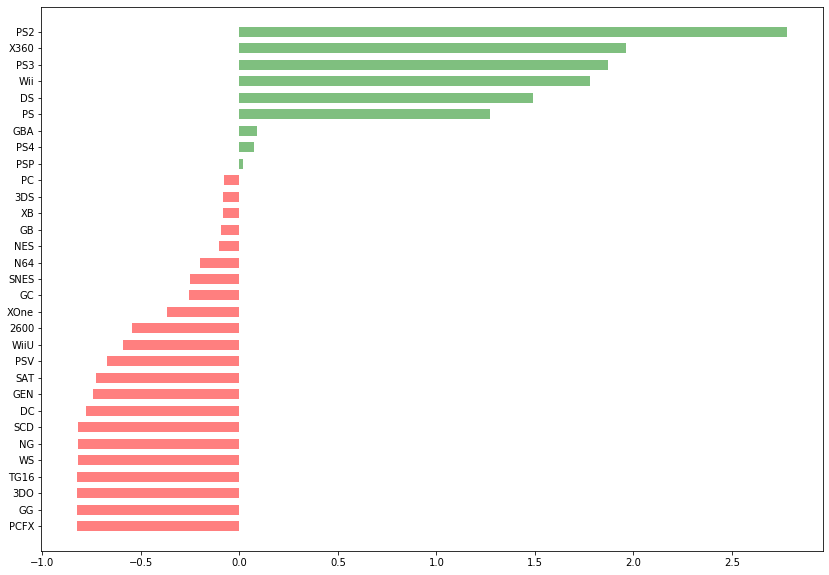

In [29]:
plt.figure(figsize=(14,10))
plt.hlines(y=platform_sales.platform, xmax=platform_sales.sales_z, xmin=0,color=platform_sales.color, alpha=0.5, linewidth=10)
plt.show()

We can notice that there are 9 platforms which are extremly greater than the average total sales. The red platforms indicates that they are below the average sales in standard devation points

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, agree with your conlusions here, the plots look great!

Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [30]:
select_platform= platform_sales.query('color=="green"')
select_platform
#selecting platforms that are above average sales

,platform,total_sales,sales_z,color
19,PSP,294.05,0.018737,green
18,PS4,314.14,0.076430,green
6,GBA,317.85,0.087084,green
15,PS,730.86,1.273145,green
4,DS,806.12,1.489273,green
26,Wii,907.51,1.780439,green
17,PS3,939.65,1.872737,green
28,X360,971.42,1.963972,green
16,PS2,1255.77,2.780554,green


In [31]:
year_of_release= data[['platform','year_of_release']]

In [32]:
df= pd.merge(left=select_platform, right=year_of_release, how='inner', on='platform')
df

,platform,total_sales,sales_z,color,year_of_release
0,PSP,294.05,0.018737,green,2005
1,PSP,294.05,0.018737,green,2008
2,PSP,294.05,0.018737,green,2006
3,PSP,294.05,0.018737,green,2010
4,PSP,294.05,0.018737,green,2006
...,...,...,...,...,...
11840,PS2,1255.77,2.780554,green,2008
11841,PS2,1255.77,2.780554,green,2008
11842,PS2,1255.77,2.780554,green,2008
11843,PS2,1255.77,2.780554,green,2008


In [33]:
platform_year= df.pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc='sum')

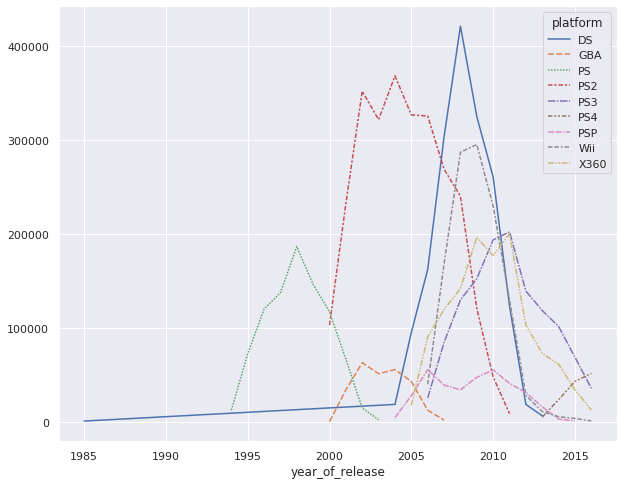

In [34]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.lineplot(data= platform_year)
plt.show()
#line chart indicates the life of a platform by total sales and over years

We can see that it takes for new platforms to appear and become popular for about 4 years and to fade away for about 4 aswell. 



I decided to filter the data and contiune my analyze from the year 2013 because before that many platforms faded away and won't be relevant for 2017.

In [35]:
new_data= data.loc[data['year_of_release']>= 2013]
new_data


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary<a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b>
        
Ok, Idan,I absolutely agree with your logic of thoughts. The year that can be considered as boundary of the current period, can be determined by building histograms for each platform (you did it) The histograms (or barplots) will show that games lose relevance within 3-4, maximum 5 years, at the same time the lifespan of the platform is on average about 10 years. The final year of the dataset is 2016, so we subtract 3-4 years from 2017 (as the year for which we buid the prediction) and get a year, which can be considered the boundary of the current period.
        
So, finally, 2013 year is correct choice.
        


In [36]:
grp= new_data.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales')
grp
#We can see the platforms leading on sales

,platform,total_sales
1,DS,1.54
5,PSP,3.50
7,Wii,13.66
6,PSV,33.25
2,PC,39.43
8,WiiU,64.63
9,X360,136.80
0,3DS,144.44
10,XOne,159.32
3,PS3,181.43


In [37]:
yoy=new_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0)
yoy

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,57.76,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,12.16,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


In [38]:
yoy_shift= (yoy- yoy.shift(+1)).fillna(0)
yoy_shift
# We can see that most of the platforms lost revenue year over year. 

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2014,-14.00,-1.54,0.90,-65.49,74.01,-2.90,1.57,-4.84,0.38,-53.84,35.11
2015,-15.98,0.00,-4.76,-30.94,18.90,-0.12,-5.91,-2.61,-5.68,-22.78,6.07
2016,-12.64,0.00,-3.27,-13.22,-49.65,-0.12,-2.00,-0.96,-11.75,-10.44,-33.99


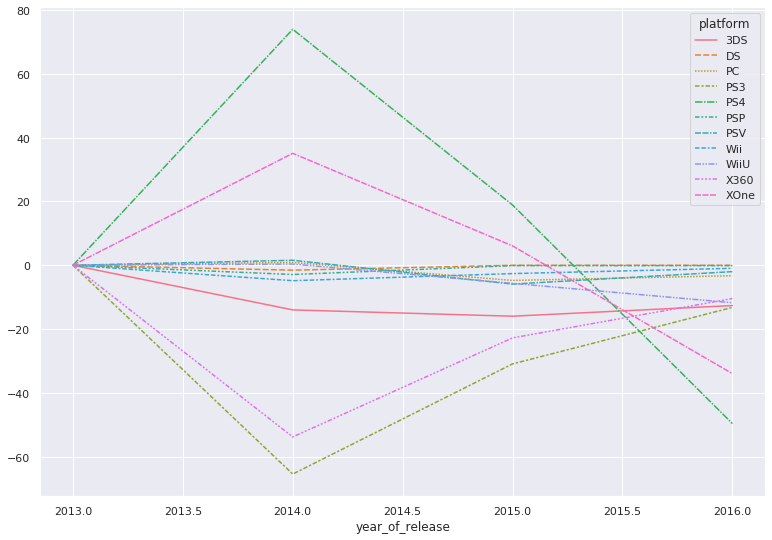

In [39]:
plt.figure(figsize=(13,9))
sns.lineplot(data=yoy_shift)
plt.show()

1. the platforms with the horizontal line are ones with no profit
2. the platforms with high peak (PS4, XOne) and then a drop are new platforms that entered the    market recently and probably stable over the year
3. 3DS, X360, PS3 are platforms that their sales dropped because of new platforms appears but recovered over 2015

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary<a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b>
        
Agree that Sony Playstation 4, Xbox One and maybe Nintendo 3DS can be considered as potentially profitable platform for 2017 year, for which we try to build the prognosis.

In [40]:
dict= yoy.to_dict('index')
dict

{2013: {'3DS': 57.760000000000005,
  'DS': 1.54,
  'PC': 12.379999999999997,
  'PS3': 113.24999999999999,
  'PS4': 25.990000000000002,
  'PSP': 3.139999999999996,
  'PSV': 10.589999999999995,
  'Wii': 8.59,
  'WiiU': 21.65,
  'X360': 88.58000000000008,
  'XOne': 18.959999999999994},
 2014: {'3DS': 43.76000000000003,
  'DS': 0.0,
  'PC': 13.279999999999994,
  'PS3': 47.76000000000002,
  'PS4': 99.99999999999996,
  'PSP': 0.24000000000000005,
  'PSV': 12.15999999999999,
  'Wii': 3.75,
  'WiiU': 22.029999999999994,
  'X360': 34.739999999999995,
  'XOne': 54.06999999999999},
 2015: {'3DS': 27.78,
  'DS': 0.0,
  'PC': 8.51999999999999,
  'PS3': 16.820000000000007,
  'PS4': 118.90000000000008,
  'PSP': 0.12000000000000001,
  'PSV': 6.249999999999988,
  'Wii': 1.14,
  'WiiU': 16.35000000000001,
  'X360': 11.959999999999997,
  'XOne': 60.14000000000002},
 2016: {'3DS': 15.13999999999999,
  'DS': 0.0,
  'PC': 5.249999999999997,
  'PS3': 3.5999999999999988,
  'PS4': 69.25000000000001,
  'PSP': 0

In [41]:
filter_dict= dict[2016]

In [42]:
n={}
for k,v in filter_dict.items():
    if v > 15:
        n[k]=(v)

In [43]:
n
n_list= n.keys()

In [44]:
select= pd.DataFrame(n_list, columns=['platform'])
select

,platform
0,3DS
1,PS4
2,XOne


In [45]:
final_data= pd.merge(left=new_data, right=select, how='inner', on='platform')
final_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
3,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
4,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
945,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
946,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
947,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
948,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,unknown,0.01


<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 
        
Idan, the logic is that you identify the lower border of the current period (you tried to choose the 2013- it is correct, in your case it is even the 2012 because you used strict inequality, but I would like to recommend you to use non-strict inequality sign, and as for your attempt to form the final data dataframe: the more correct logic is to choose the lower border of the current period that allows to not include the outdated platforms (while you chose the PS3, X360 - these platform can be considered as outdated so it is better not to include them in the analysis) if the lower border of the current period is specified correctly there is no need to filter the data by hand especially since self-selection can lead to distortion of the final results of the analysis in some way.
</div>

<font color='Purple'>Student's commentary: Hi Arina, nice to meet you again. To be honest I struggled with your comment a lot, trying to understand how to form the data not as I did. I understood your logics behind it but how to write the code I didn't really know how. I came up with this solution after I saw Q&A session on dictionaries and I thought it will be a good practice to me. looking foward to read what you meant and hopefully start my vacation week :)

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Idan, first of all, thank you so much for the feddback, the second thing - it is absolutely great that you tried to cover new materials and topics, I agree that understanding of the dictionaries is a must have:)
        
As for my recommendation, let me clarify. The logic is simple: in the code below you created the slice of the data with actual period, and yes, here you change it to non-strict, it is ok. And that's it: at the next steps of the analysis you can use this data in `new_data` everywhere, so there is no need to filter it additionally in somehow or smth like this, I hope now it is more clear for you😉


`new_data= data.loc[data['year_of_release']>= 2013]`

Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

In [46]:
platform_game_grp= final_data.groupby(['name','platform'])['total_sales'].sum().reset_index()
platform_game_grp

,name,platform,total_sales
0,Beyblade Burst,3DS,0.03
1,Fire Emblem Fates,3DS,1.67
2,Frozen: Olaf's Quest,3DS,0.59
3,Haikyu!! Cross Team Match!,3DS,0.04
4,12-Sai. Honto no Kimochi,3DS,0.07
...,...,...,...
945,Zombie Army Trilogy,XOne,0.11
946,Zoo Tycoon (2013),XOne,0.36
947,Zumba Fitness: World Party,XOne,0.24
948,Zyuden Sentai Kyoryuger: Game de Gaburincho!!,3DS,0.05


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0, 5)

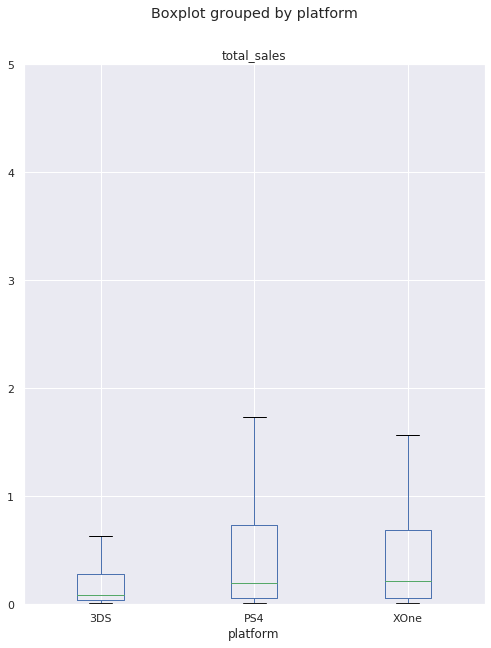

In [47]:
platform_game_grp.boxplot(column='total_sales', by='platform',showfliers = False, figsize=(8,10))
plt.ylim(0,5)

1. The medians of the platforms are more or less the same. 
2. All platforms has a lot of outliers
3. PS4 has the most income then others
4. 3DS and PS3 are smaller platforms rather than PS4, X360 and XOne
5. We can see that the new platforms (PS4 & Xone) taking their shares in sales from the previous platforms  

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
As for your boxplot: if you want to exclude outliers from the picture, you can use `showfliers = False`

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍</b> 

In [48]:
platform_game_grp1= final_data.groupby('platform')['total_sales'].mean().reset_index().sort_values(by='total_sales')
platform_game_grp1

,platform,total_sales
0,3DS,0.464437
2,XOne,0.645020
1,PS4,0.801378


In [49]:
final_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
3,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
4,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
945,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
946,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
947,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
948,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,unknown,0.01


Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

In [50]:
#final_data2= final_data.loc[final_data['user_score'] != "tbd"].copy()
#excluding the tbd 

In [51]:
#final_data2['user_score']= final_data2['user_score'].astype(float).fillna(final_data2['user_score'].median())

In [52]:
def score_affect(platform,score_type):
    func= final_data[final_data['platform']== platform][['total_sales',score_type]]
    sns.scatterplot(x=score_type, y='total_sales', data=final_data)
    
    if func.total_sales.corr(func[score_type]) >0.7 :
        print('positive between this score and sales')
    else: 
        print('weak correlation')

weak correlation


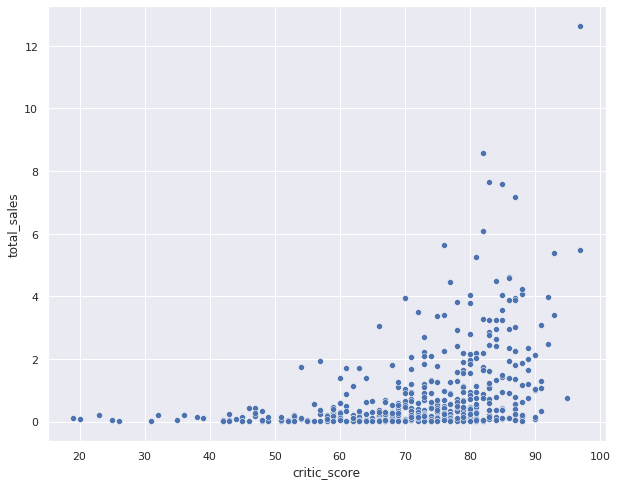

In [53]:
score_affect('PS4', 'critic_score')

weak correlation


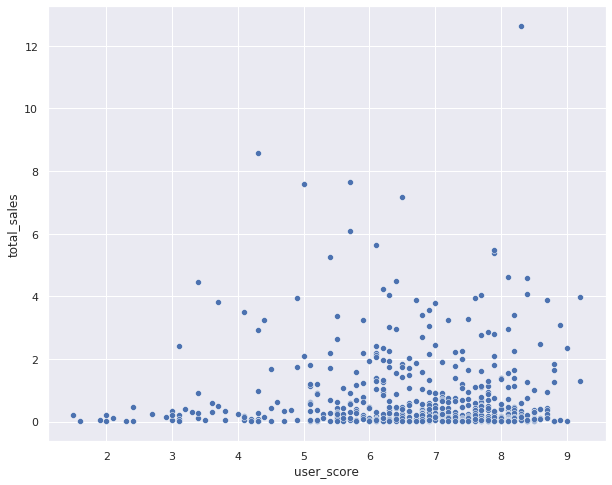

In [54]:
score_affect('PS4','user_score')

There is no correlation between user and critic score to total sales. We can see that there isn't a clear realation between higher score and higher revenue.

Keeping your conclusions in mind, compare the sales of the same games on other platforms

weak correlation


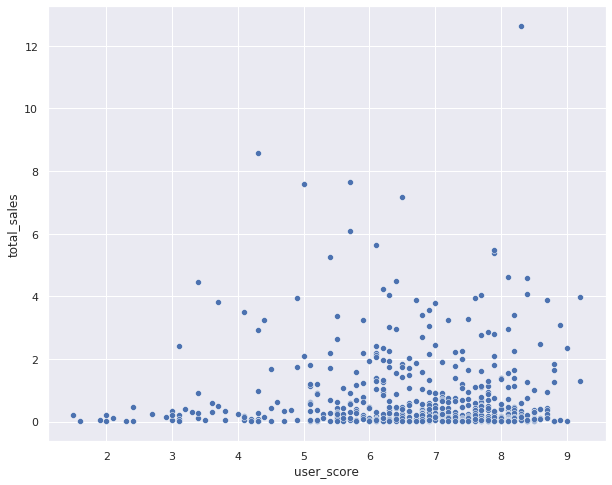

In [55]:
score_affect('3DS', 'user_score')

weak correlation


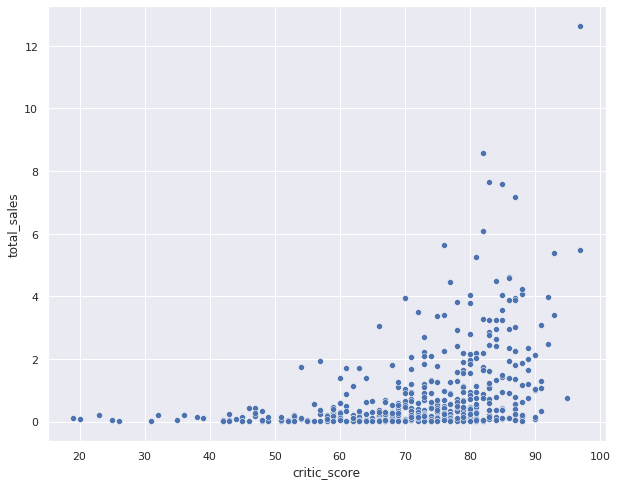

In [56]:
score_affect('3DS', 'critic_score')

weak correlation


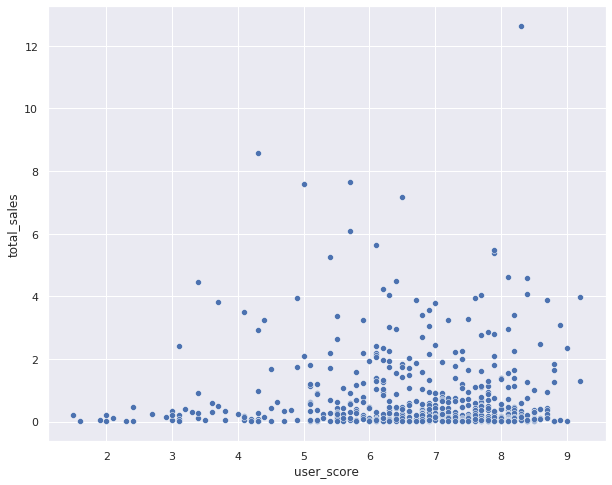

In [57]:
score_affect('XOne', 'user_score')

weak correlation


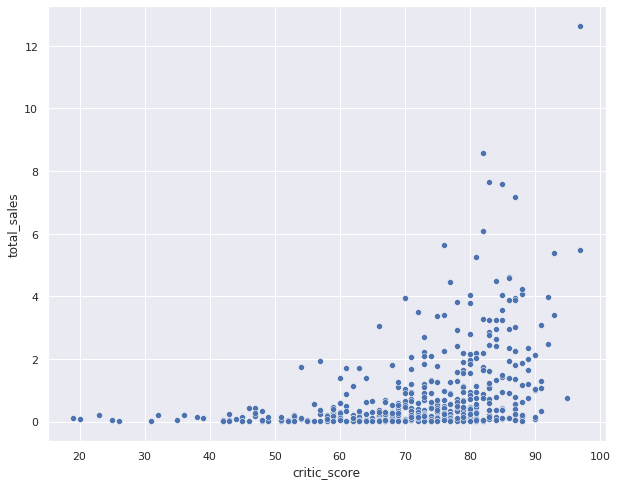

In [58]:
score_affect('XOne', 'critic_score')

Like the scatter plots of PS4 also the rest of the platforms are scatters the same which means there is a weak positive correlation between them

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
As a whole the logic of your decision here is correct, but I would like to recommend you to pay attention to potentially profitable and actual platforms, like PS4 for example. PS3 is outdated platform, it is better not to draw on conclusions from the analysis of this platform.

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
And one point about the correlation analysis interpretation:
       
 1) correlation is always correlation, we canno say if the coefficients is small that there are no correlation, it is, but there is weak positive/negative relationship between the variables that is why we can state that such a relationship can be neglected, so please be more attentive to the interpretation and terms:
       
https://www.investopedia.com/ask/answers/032515/what-does-it-mean-if-correlation-coefficient-positive-negative-or-zero.asp
       
https://statisticsbyjim.com/basics/correlations/
       
https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, this time the logic of the decision and correlation interpretation is more correct.

Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [59]:
genre_sales= final_data.groupby(['genre'])['total_sales'].sum().reset_index()
genre_sales.sort_values(by='total_sales', ascending=False)

,genre,total_sales
0,Action,167.85
8,Shooter,149.02
7,Role-Playing,106.94
10,Sports,84.19
3,Misc,22.72
6,Racing,22.02
2,Fighting,19.31
4,Platform,17.41
1,Adventure,12.44
9,Simulation,11.94


We can see each genre and its total sales

In [60]:
genre_dist= final_data.groupby(['genre'])['name'].count().reset_index()
genre_dist.sort_values(by='name', ascending=False)

,genre,name
0,Action,346
7,Role-Playing,128
10,Sports,93
8,Shooter,81
3,Misc,71
1,Adventure,70
6,Racing,40
2,Fighting,32
4,Platform,32
9,Simulation,27


The most popular genre since 2013 is Action.

In [61]:
genre= pd.merge(left= genre_dist, right= genre_sales, how='inner', on='genre')
genre['share']= (genre['total_sales'] / genre['name']).round(2)
genre.sort_values(by='share', ascending=False)

,genre,name,total_sales,share
8,Shooter,81,149.02,1.84
10,Sports,93,84.19,0.91
7,Role-Playing,128,106.94,0.84
2,Fighting,32,19.31,0.60
6,Racing,40,22.02,0.55
4,Platform,32,17.41,0.54
0,Action,346,167.85,0.49
9,Simulation,27,11.94,0.44
3,Misc,71,22.72,0.32
1,Adventure,70,12.44,0.18


Although Action genre is most popular, its income share per game is only in fifth place. Shooter's game is most profitable

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary<a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b>
        
Ok, here the logic of the analysis is correct!

# Conclusion

From the initial data we can conclude number of things:
1. The data is not up to date and contains a lot of information that is not relevant for our analsis
2. I found there was high peak of releasing game in 2008-2010 but the a fall
3. The games which is relevant for our campign are from 2013
4. Not all of the platforms since 2013 are still relevant. many of them are not profitable
5. There is no signicant correlation between income sales and critics and user reviews
6. Not all genres are equally popular, Action genre is the most popluar
7. PS4's games are the most expensives 

# Step 4. Create a user profile for each region


The top five platforms. Describe variations in their market shares from region to region.

In [62]:
def top5(x):
    func= new_data.groupby('platform')[x].sum().reset_index()
    func['share']= (func[x] / func[x].sum()) * 100
    print(func.sort_values(by=x, ascending=False).head())
    pie, ax = plt.subplots(figsize=(10,6))
    colors = sns.color_palette("husl", 9)
    plt.pie(func['share'], explode=[0.002]* func['share'], colors = colors,autopct='%1.0f%%',pctdistance=0.7, labeldistance=1.3)
    plt.legend(func['platform'] ,bbox_to_anchor=(1.4, 1.2))
    plt.tight_layout()
    plt.show()


   platform  na_sales      share
4       PS4    108.74  24.789131
10     XOne     93.12  21.228286
9      X360     81.66  18.615784
3       PS3     63.50  14.475904
0       3DS     39.04   8.899831


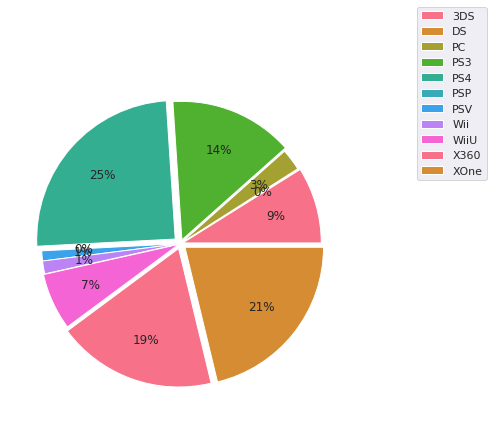

In [63]:
top5('na_sales')

   platform  eu_sales      share
4       PS4    141.09  35.947413
3       PS3     67.81  17.276873
10     XOne     51.59  13.144284
9      X360     42.52  10.833397
0       3DS     31.17   7.941604


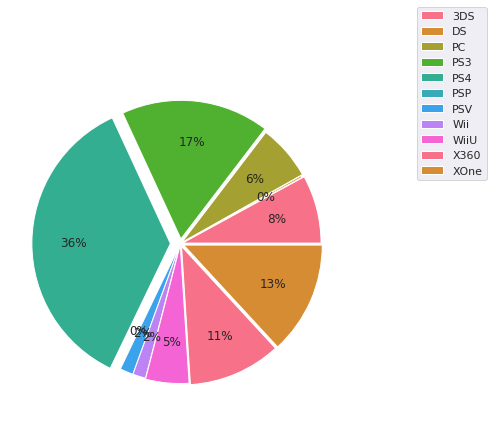

In [64]:
top5('eu_sales')

  platform  jp_sales      share
0      3DS     67.86  48.161817
3      PS3     23.35  16.572037
6      PSV     18.66  13.243435
4      PS4     15.96  11.327182
8     WiiU     10.88   7.721789


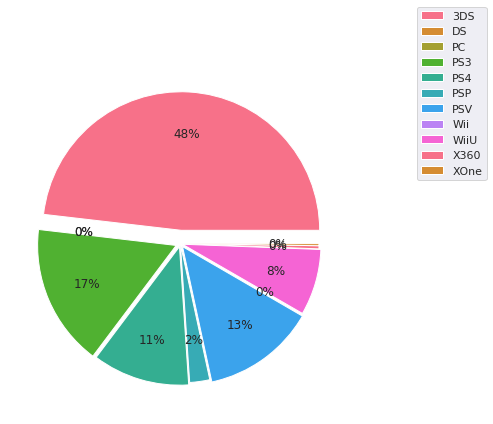

In [65]:
top5('jp_sales')

The top five genres. Explain the difference.


In [66]:
def top5genre(x):
    func= new_data.groupby('genre')[x].sum().reset_index()
    print(func.sort_values(by=x, ascending=False).head())

In [67]:
top5genre('na_sales')

           genre  na_sales
0         Action    126.23
8        Shooter    109.78
10        Sports     65.27
7   Role-Playing     46.51
3           Misc     27.49


In [68]:
top5genre('eu_sales')

           genre  eu_sales
0         Action    118.32
8        Shooter     87.88
10        Sports     60.52
7   Role-Playing     37.02
6         Racing     20.19


In [69]:
top5genre('jp_sales')

          genre  jp_sales
7  Role-Playing     51.14
0        Action     40.49
3          Misc      9.20
2      Fighting      7.65
8       Shooter      6.61


We can notice that North america gamers and european gamers have in general the same prefrences of genres. But Japaneese gamers prefer different genres. while Japan's number one genre is role-playing, in NA and EU is in the forth place. My guess is that due to cultural differences between western and eastern culture it reflects also on game genres.

In [70]:
def top5rating(x):
    func= new_data.groupby('rating')[x].mean().reset_index()
    print(func.sort_values(by=x, ascending=False).head())

In [71]:
top5rating('na_sales')

    rating  na_sales
2        M  0.447724
0        E  0.260428
1     E10+  0.214567
3        T  0.149493
4  unknown  0.091531


In [72]:
top5rating('eu_sales')

    rating  eu_sales
2        M  0.393821
0        E  0.274276
1     E10+  0.168819
3        T  0.125373
4  unknown  0.080520


In [73]:
top5rating('jp_sales')

    rating  jp_sales
4  unknown  0.086837
3        T  0.061672
0        E  0.049803
2        M  0.038238
1     E10+  0.023189


We can see that for North America and Europe the number one rating is for adults while in Japan we have a lot of missing ratings and also teen above 13 years old.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary<a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b>
        
As a whole logic is correct again, keep it up! 

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
Some recommendations for pie charts:
       
now the labels on your plots are overlapping. It is better to fix it:
       
See the examples here:
       
https://stackoverflow.com/questions/23577505/how-to-avoid-overlapping-of-labels-autopct-in-a-matplotlib-pie-chart
       
Also, it is important to analyse games without rating
       


<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, agree with new version!

# Step 5. Test the following hypotheses:


In [74]:
xone= new_data.query('platform=="XOne"')

In [75]:
pc= new_data.query('platform=="PC"')



<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 
        
Idan, it is better to change the logic of samples formations:
        
1) first of all - you can preprocess the tbd without excluding it from the data (see my recommendations above)
        
2) it is not very correct to fill missing values with 0, because the zeroes can influence the result of t-test.
        
if there are any missing values in your samples you can drop them using `drop()` as you did, it is absolutely correct, or (and this method is more logical) you can use special argument `nan_policy` that can specified as `omit`, so it helps to drop NaN values too in  `st.ttest_ind`

       
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
        
so the strategy: remain missing values as they are and simply then exclude them from the samples using special argument in stats.ttest_ind
</div>

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Good job, this time the samples are formatted more correctly!

In [76]:
def ttest(sample1,sample2,alpha):
    p_value_levene= stats.levene(sample1, sample2).pvalue.astype(int)
    if p_value_levene<alpha:
        option_var=False
    else:
        option_var=True
    p_value=stats.ttest_ind(sample1, sample2,nan_policy='omit',equal_var=option_var).pvalue
    if p_value<alpha:
        print('Reject H0: average of sample 1 is not equal to average of sample 2')
    else:
        print("Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 \
 and sample 2 are not the same")
    print('P-value is:',p_value)

In [77]:
ttest(xone['user_score'], pc['user_score'], alpha=0.05)

Fail to Reject H0: We don't have enough evidence to say that averages of sample 1  and sample 2 are not the same
P-value is: 0.14759623175170208



<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 
        
It is better to show the p-value, this value is important.

The null hypothesis is that sample 1 is equal to sample 2.
The alternative hypothesis (H1) is that the samples are different. 
I set the signicant level to 5% (The most common level). 
The P_value is greater then 5% which means that the PC user ratings are not different from Xbox One user ratings

In [78]:
action= new_data.query('genre=="Action"')

In [79]:
sport= new_data.query('genre=="Sports"')

In [80]:
ttest(sport['user_score'], action['user_score'], alpha=0.05) 

Reject H0: average of sample 1 is not equal to average of sample 2
P-value is: 1.4712321410912196e-20


The null hypothesis is that sample 1 is equal to sample 2. The alternative hypothesis (H1) is that the samples are different. I set the signicant level to 5% (The most common level). The P_value is less then 5% which means that indeed like it was asked, the sport's and action's user ratings are different.


<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 
        
The same recommendations about samples and p-value here.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Agree with your improvements at this step of the analysis, you are doing great!

#  Step 6. Overall conclusion

The game market is changing rapidly and it is very dynamic, we can see a huge drop in game sales world wide for several years, therefore the campign for next year needs to precise as much as we can.
Based on the data we can point out number of trends that will be relevant for us. Before I elaborate my findings I need to point out about the quality of the data. User and critics reviews was missing lot of data that could have been helpful to us. I tried to fill in the missing data without distort it and change it.
Back to the analsys:
1. Games platforms (Pc and various consoles) lives only for 6-8 years, the ones that is relevant for 2017 are: PS3,      PS4, Xone, X360, 3DS. The rest of the platforms still has a small market but will probably will die durnig 2017.
2. PS4 and Xone are new platforms that are the successors of PS3 and X360. I can predict that new platforms will raise    in sales over 2017 and eventually extinct the older platforms
3. As for genres we can see that Action, Shooters and Sports genres are the most popular world wide but is not the        most profitable. we need to take in account that Role-Playing genre is more profitable then Action genre
4. When building an advertisment campign we need to consider our geographic target market. While North Amercia and        europe are similar markets, the Japanese market is different in number of subjects. Western markets leading in PS4    and Xone platforms while Japan leading platform is 3DS (Xone isn't in the top 5). Western market leading genres are    Action and Shooters while japan leading genres are Role-Playing and Action. In terms of ESRB, the target audience      for the Western market are grown-ups (+17) and teens while the Japansese target audience is more diverse and most of it is unknown   

<div style="border:solid Chocolate 2px; padding: 40px">

**The overall review conclusion**

Idan, thank you for submitting your project! I can see that you've worked really hard on it! I'm really impressed this the amount of work you have done. But there are several things in your project which I suppose it is important to fix in order to make your project really ideal! My comments will navigate you!


**Good things and practices in your project I want to highlight🙂**:

* You use different methods for working with your data. It is really great that you can apply these methods on practice, keep it up!
* You worked with the visualization, it is really good that you use plots in your work!
* You have formulated conclusions after the each step of the analysis, good job!
* The test for statistical hypotheses testing is chosen correctly.
    
**What is worth working on👀**:

* It is important to correct the samples formation and preprocess the tbd value.
* Other recommendations you will find in my comments.

**Good luck! I will wait for your work for a second iteration of the review!😉**
![gif](https://media.giphy.com/media/j1Xyt3DHfJcmk/giphy.gif)

<div style="border:solid Chocolate 2px; padding: 40px">

**The overall review conclusion: second iteration of the review**

Idan, thank you for submitting your project with corrections! And thank you for your feedback too, I really appreciate it😊
    
You did a great job to improve the project, I can see your progress, so I hasten to say that your project has been accepted and you can proceed to the next sprint!
    
**I wish you exciting and cool projects in the next sprints😉**

![gif](https://media.giphy.com/media/l41Yh1olOKd1Tgbw4/giphy.gif)  